## Binary Classifiers

### Part 1 - Simple Logisitc Regression

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details. This dataset is a small dataset which includes 8 key features & a binary target value as follows:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1) 

A small logistic regression model will be developed in an attempt to predict whether a patient is likely (represented by 1) or not likely (represented by 0) to develop diabetes in the next 5 years.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Before implementing a model to preict the likelihood of diabetes it is first useful to visualise some basic details about the dataset.

In [3]:
data = pd.read_csv('pima-indians-diabetes.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After an initial view of the data we can see that all features contain numeric data, however, the scale of each feature is inconsistent and we may need to apply some feature scaling to enure that out learning model can handle this data correctly.

Before applying feature scaling it is often worth building a correlation matrix to see which features are highly correlated with the targe value. Viewing the correlation matrix shows that all feature columns have a positive correlation with the target value but columns 1 (Plasma glucose concentration a 2 hours in an oral glucose tolerance test) and 5 (Body mass index (weight in kg/(height in m)^2)) appear to have the highest correlation. 

With this in mind, we will initially build our logistic regression model using these two features only and see what results we can obtain. 

In [4]:
correlations = data.corr()
correlations[8].sort_values(ascending=False)

8    1.000000
1    0.466581
5    0.292695
7    0.238356
0    0.221898
6    0.173844
4    0.130548
3    0.074752
2    0.065068
Name: 8, dtype: float64

In addition to viewing the correlation matrix it can also be useful to view a scatter plot of the features that we have chosen to form the basis of the model.

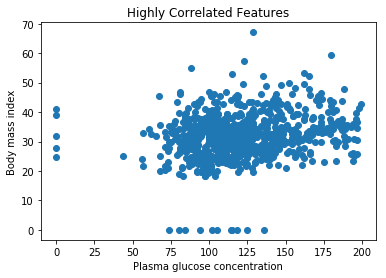

In [5]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

After viewing the scatter plot above it is immediately obvious that we have some missing values in this dataset. With some domain knowledge we can deduce that it should not be possible to have a body mass index or plasma glucose concentration of 0 and we will need to remove this dirty data before building our learning model. This can be achieved quickly by replacing the missing values with `NaN` and then removing these rows from the dataset.

In [6]:
data[[1,5]] = data[[1,5]].replace(0, np.NaN)
data.dropna(inplace=True)

Once the data has been cleaned up our scatter plot looks much more uniform.

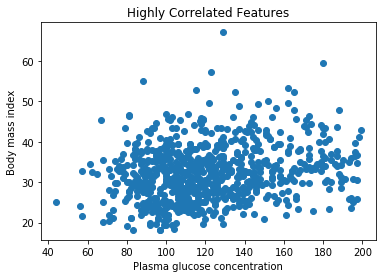

In [7]:
visualise(data)

Since we have decided to use features 1 and 5 to build our logistic regression classifier we can extract the feature columns and target values easily as follows:

In [8]:
X = data.iloc[:,[1,5]].values
y = data.iloc[:,-1].values

In addition, now that we have our feature colums isolated we can apply feature scaling. This can be achieved using the `StandardScaler` class of the `sklearn.preprocessing` package as follows:

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

After feature scaling has been applied our dataset is now a two dimensional `numpy` array where our feature columns are transformed such that their distribution will have a mean value 0 and standard deviation of 1.

In [10]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


The first ten rows of our dataset now look like this:

In [11]:
print(X[0:10,:])

[[ 0.85211873  0.16540919]
 [-1.2079944  -0.84552075]
 [ 1.99662603 -1.322102  ]
 [-1.07719357 -0.62889291]
 [ 0.49241644  1.53738552]
 [-0.19428794 -0.98993931]
 [-1.43689586 -0.21007908]
 [-0.22698815  0.41092074]
 [ 2.45442895 -0.28228836]
 [-0.39048919  0.74308343]]


Next we will split the dataset into a training set and a test set which will be useful when evaluating the model's performace. An 80% / 20% split will be used when splitting the dataset.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Once we have our training set and test set we can define a `LogisticRegression` model and fit it to our training data. Once trained, the model can then be used to make predictions against the test set.

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

There are a number of different ways that we can evaluate the performance of our model but perhaps the simplest is to compute the confusion matrix:

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 12]
 [18 29]]


In [1]:
%%html
<style>
table {float:left}
</style>

The confusion matrix is a summary of prediction results for a given classification problem. The confusion matrix shows the number of correct and incorrect predictions broken down by each class. 

For example, we can interpret the confusion matrix above as follows:

|                      | had diabetes   | did not have diabetes |
|----------------------|----------------|-----------------------|
|predicted diabetes    | true positive  | false positive        |
|predicted no-diabetes | false negative | true negative         |

In this case, the number of true positives was 92 and the number of true negatives was 29. This means we made a total of 121 correct predictions out of a total of 151 (~80%). The confusion matrix also allows us to predict two additional statistics which are good for model evaluation, namely precision and recall.

In [25]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

Precision: 0.884615 Recall 0.836364


Precision-Recall is a useful measure of success of prediction when the classes are imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Overall our `LogisticRegression` model using just two of the features provided does a decent job of predicting the onset of diabetes within 5 years in Pima Indians, however, a more complicated model might be able to provide even better results. The second part of this analysis will build a small Artificial Neural Network to see if we can improve model performance.